# UAS Analitika Media Sosial
## Prediksi pada Pasar Saham 

### Adam Shofil Fuadi
### A12.2020.06463

#### Latar Belakang
Pasar saham adalah tempat saham perusahaan yang dimiliki secara publik dapat dibeli dan dijual, baik secara OTC (luar bursa) maupun melalui bursa yang dipusatkan.Pasar saham atau pasar ekuitas menawarkan peluang kepada investor untuk meningkatkan pendapatan mereka tanpa risiko tinggi dalam memasuki bisnis mereka sendiri dengan biaya overhead dan biaya rintisan yang tinggi. Terdapat berbagai cara yang dilakukan dalam melakukan perdagangan saham. Umumnya investor membeli suatu saham dibawah harga pasarnya dan akan menjual saham diatas harga pasar untuk memperoleh keuntungan.

#### Tujuan
Disini saya mencoba melakukan eksperimen untuk memprediksi waktu yang tepat bagi para investor untuk membeli saham dibawah harga pasarnya dan menjual saham diatas harga pasar untuk memperoleh keuntungan. Dataset yang digunakan didapat melalui proses download dari package yfinance yang kemudian dilakukan proses cleaning menggunakan pandas dan digabungkan dengan machine learning. Menggunakan pemodelan Random Forest dan membuat prediksi menggunakan backtesting dan dilanjutkan dengan mengembangkan model dengan menambahkan predictor. Hasil akhir yang diharapkan yaitu dapat memprediksi dan membantu investor untuk membantu dalam mengambil keputusan dalam membeli saham.

# Persiapan Data

## Installasi  package yfinance

In [ ]:
#pip install yfinance

## Mengimpor paket yfinance, pandas, dan os

In [1]:
import yfinance as yf
import pandas as pd
import os

In [2]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

Mendownload dataset menggunakan package yfinance yaitu package yang memanggil API dari Yahoo Finance untuk download harga dan index saham harian dengan file bernama sp500.csv. Ticker class berfungsi untuk mengunduh history data harga saham dengan menggunakan suatu simbol. simbol yang digunakan kali ini yaitu GSPC atau index dari sp500.

In [3]:
sp500.index = pd.to_datetime(sp500.index)

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-03 00:00:00-05:00,3853.290039,3878.459961,3794.330078,3824.139893,3959140000,0.0,0.0
2023-01-04 00:00:00-05:00,3840.360107,3873.159912,3815.770020,3852.969971,4414080000,0.0,0.0
2023-01-05 00:00:00-05:00,3839.739990,3839.739990,3802.419922,3808.100098,3893450000,0.0,0.0


Diatas merupakan index dari sp500 yang telah diunduh dengan data dari hari saat dilakukan perdagangan saham atau trading. Tertera beberapa kolom yang akan digunakan untuk prediksi nanti yaitu OPEN yang menunjukan harga saham diwaktu pasar dibuka, HIGH yaitu harga tertinggi dihari itu, LOW yaitu harga terendah dihari itu, CLOSE yaitu harga saham diwaktu pasar ditutup, dan VOLUME yaitu menunjukan jumlah saham yang diperdagangkan hari itu.

# Pembersihan dan Pembuatan Visualisasi Data

<AxesSubplot:xlabel='Date'>

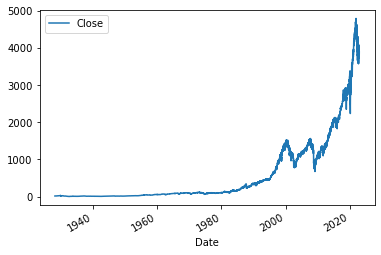

In [5]:
sp500.plot.line(y="Close", use_index=True)

Membuat visualisasi data dengan membuat grafik yang menunjukan Harga CLOSE pada hari itu di masa lalu

In [6]:
del sp500["Dividends"]
del sp500["Stock Splits"]

 Melakukan pembersihan dengan menghapus kolom yang tidak digunakan

# Menentukan Target untuk Machine Learning
target yang dituju yaitu untuk dapat memprediksi apakah harga akan naik atau turun dengan cukup akurat

In [7]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [8]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-01-03 00:00:00-05:00,3853.290039,3878.459961,3794.330078,3824.139893,3959140000,3852.969971
2023-01-04 00:00:00-05:00,3840.360107,3873.159912,3815.770020,3852.969971,4414080000,3808.100098
2023-01-05 00:00:00-05:00,3839.739990,3839.739990,3802.419922,3808.100098,3893450000,3895.080078


Mengubah kolom CLOSE dengan memindahkan nilainya ke kolom TOMORROW sehingga Kolom TOMORROW terisi dengan nilai hari berikutnya.

In [9]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-01-03 00:00:00-05:00,3853.290039,3878.459961,3794.330078,3824.139893,3959140000,3852.969971,1
2023-01-04 00:00:00-05:00,3840.360107,3873.159912,3815.770020,3852.969971,4414080000,3808.100098,0
2023-01-05 00:00:00-05:00,3839.739990,3839.739990,3802.419922,3808.100098,3893450000,3895.080078,1


Menentukan target dengan membuat model boolean nilai target = nilai TOMORROW lebih dari nilai CLOSE sehingga saat ditampilkan terdapat kolom TARGET yang berisi 1 jika harga naik dan berisi 0 jikaa harga turun.

In [11]:
sp500 = sp500.loc["1990-01-01":].copy()

In [12]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-01-03 00:00:00-05:00,3853.290039,3878.459961,3794.330078,3824.139893,3959140000,3852.969971,1
2023-01-04 00:00:00-05:00,3840.360107,3873.159912,3815.770020,3852.969971,4414080000,3808.100098,0
2023-01-05 00:00:00-05:00,3839.739990,3839.739990,3802.419922,3808.100098,3893450000,3895.080078,1


Menetapkan batasan untuk mengambil data dimasa lalu agar hasil yang diinginkan lebih bagus dan akurat. 

## Membuat model Machine Learning
mengimport Random Forest Model dari package sklearn

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

Membagi data kedalam Train dan Test dengan memasukan semua baris kecuali 100 baris terakhir kedalam Train dan memasukan 100 baris terakhir kedalam Test. Kemudian menentukan Predictors dengan kolom seperti CLOSE, VOLUME, OPEN, HIGH, LOW. Menggunakan kolom predictors akan dicoba untuk memprediksi Target.

In [14]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.3472222222222222

Mengimpor dari package sklearn untuk menghitung nilai presisi dari prediksi yang telah dilakukan dan mendapatkan nilai sebagai diatas

<AxesSubplot:xlabel='Date'>

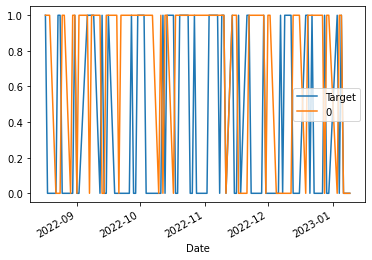

In [15]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

Mencoba menggabungkan nilai asli dengan nilai dari hasil prediksi sehingga didapatkan grafik yang menunjukan garis orange yang menunjukan hasil prediksi dan garis biru menunjukan apa yang sebenarnya terjadi. 

# Membuat sistem Backtesting

In [16]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

Membuat fungsi PREDICT dilakukan dengan membuat fungsi prediksi yaitu dengan menggabungkan yang telah dilakukan sebelumnya mulai dari model.fit, model.predict, model predict series, kemudian digabungkan menjadi satu

In [17]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

Membuat fungsi BACKTEST yang berisi data, model, predictor, start, step. maksud dari 250 yaitu hari yang dilakukan untuk trading dalam setahun. Sehingga maksudnya yaitu menggunakan nilai data tahun sebelumnya untuk memprediksi nilai pada tahun berikutnya.

In [18]:
predictions = backtest(sp500, model, predictors)

melakukan prediksi menggunakan backtest yang berisi sp500, model, predictors

In [19]:
predictions["Predictions"].value_counts()

0    3389
1    2431
Name: Predictions, dtype: int64

Melakukan pengetesan yang menunnjukan hasil 0 yaitu harga turun sebanyak 3389 hari dan 1 yaitu harga naik sebanyak 2431 hari 

In [20]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5277663512957631

Hasil pengetesan tadi menunjukan nilai akurasi senilai diatas

In [21]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.533849
0    0.466151
Name: Target, dtype: float64

Digunakan sebagai pembanding apakah nilai akurasi tadi terbilang bagus atau tidak

# Menambah predictor tambahan kedalam model

In [22]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

Berfungsi untuk menambah tingkat akurasi pada prediksi dengan menghitung jumlah rata rata harga CLOSE pada 2 hari terakhir, seminggu terakhir, 3 bulan terakhir, setahun terakhir, dan 4 tahun terakhir kemudia menemukan perbandingan harga CLOSE hari ini di periode tersebut. Hasilnya akan muncul pada dataframe sebagai kolom baru.

In [23]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03 00:00:00-05:00,3853.290039,3878.459961,3794.330078,3824.139893,3959140000,3852.969971,1,0.997996,0.0,0.999755,1.0,0.991132,24.0,0.934576,107.0,1.052104,540.0
2023-01-04 00:00:00-05:00,3840.360107,3873.159912,3815.770020,3852.969971,4414080000,3808.100098,0,1.003755,1.0,1.006044,2.0,0.997685,25.0,0.942403,108.0,1.059674,540.0
2023-01-05 00:00:00-05:00,3839.739990,3839.739990,3802.419922,3808.100098,3893450000,3895.080078,1,0.994143,1.0,0.993038,2.0,0.985234,25.0,0.932238,108.0,1.046990,539.0


In [24]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

Berfungsi untuk menghilangkan nilai NaN 

In [25]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03 00:00:00-05:00,3853.290039,3878.459961,3794.330078,3824.139893,3959140000,3852.969971,1,0.997996,0.0,0.999755,1.0,0.991132,24.0,0.934576,107.0,1.052104,540.0
2023-01-04 00:00:00-05:00,3840.360107,3873.159912,3815.770020,3852.969971,4414080000,3808.100098,0,1.003755,1.0,1.006044,2.0,0.997685,25.0,0.942403,108.0,1.059674,540.0
2023-01-05 00:00:00-05:00,3839.739990,3839.739990,3802.419922,3808.100098,3893450000,3895.080078,1,0.994143,1.0,0.993038,2.0,0.985234,25.0,0.932238,108.0,1.046990,539.0


# Mengembangkan Model

In [26]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

Dengan cara meningkatkan n_estimators, serta menurunkan min_samples_split

In [27]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

Dan juga menambahkan aturan yang lebih spesifik seperti pada nilai preds

In [28]:
predictions = backtest(sp500, model, new_predictors)

Melakukan tes ulang menggunakan predictors yaitu new_predictors

In [29]:
predictions["Predictions"].value_counts()

0.0    4007
1.0     813
Name: Predictions, dtype: int64

Digunakan untuk mengetahui apakah terdapat perubahan setelah penerapan predictor baru

In [30]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5694956949569495

Mengecek nilai akurasi terbaru

In [31]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.543983
0    0.456017
Name: Target, dtype: float64

In [32]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2023-01-03 00:00:00-05:00,1,0.0
2023-01-04 00:00:00-05:00,0,0.0
2023-01-05 00:00:00-05:00,1,0.0
